In [1]:
#Delta（大写 Δ，小写 δ） 神经单元误差
#Nabla算子（nabla operator），又称劈形算子，倒三角算子，哈密顿算子，是一个微分算子。▽ 梯度
#Todo 1.增加测试集
#     2.Drop out
#     3.Adam
#     4.Softmax
#     5.偏差-方差 曲线
#     6.Relu 随机初始化
#     7. Batch normal
#     8. 卷积神经网络
#     9. 保存参数 预训练
#     10.Momemtum

In [2]:
import math
import random
#矩阵之间乘法 输入矩阵MA,MB为列表的列表
def MatrixMulti(MA,MB):
    MA_row,MA_col=len(MA),len(MA[0])
    MB_row,MB_col=len(MB),len(MB[0])
    #生成MA_row行 MB_col列的二维矩阵
    MC=[[0]*MB_col for row in range(MA_row)]
    if(MA_col==MB_row):
        #得到一个A的行，B的列的矩阵
        for row in range(MA_row):
            for col in range(MB_col):
                MC[row][col]=0
                #点积个数为A的列(B的行) A是遍历列，B是遍历行(因为是A的行与B的列内积)
                for dot in range(MA_col):
                    MC[row][col]+=MA[row][dot]*MB[dot][col]
    return MC

def Matrixadd(MA,MB):
    MA_row,MA_col=len(MA),len(MA[0])
    MB_row,MB_col=len(MB),len(MB[0])
    #生成MA_row行 MB_col列的二维矩阵
    MC=[[0]*MB_col for row in range(MA_row)]
    if(MA_row==MB_row and MA_col==MB_col):
        for row in range(MA_row):
            for col in range(MA_col):
                MC[row][col]=MA[row][col]+MB[row][col]
    return MC

def Matrixsub(MA,MB):
    MA_row,MA_col=len(MA),len(MA[0])
    MB_row,MB_col=len(MB),len(MB[0])
    #生成MA_row行 MB_col列的二维矩阵
    MC=[[0]*MB_col for row in range(MA_row)]
    if(MA_row==MB_row and MA_col==MB_col):
        for row in range(MA_row):
            for col in range(MA_col):
                MC[row][col]=MA[row][col]-MB[row][col]
    return MC

def MatrixHadamard(MA,MB):
    MA_row,MA_col=len(MA),len(MA[0])
    MB_row,MB_col=len(MB),len(MB[0])
    #生成MA_row行 MB_col列的二维矩阵
    MC=[[0]*MB_col for row in range(MA_row)]
    if(MA_row==MB_row and MA_col==MB_col):
        for row in range(MA_row):
            for col in range(MA_col):
                MC[row][col]=MA[row][col]*MB[row][col]
    return MC
    
    
#重塑方法，将i*j的矩阵转换为m*n的矩阵(i*j=m*n)
def reshape(matrix,row,col):
    M=[[0]*col for r in range(row)]
    m_row=len(matrix)
    m_col=len(matrix[0])
    for i in range(row):
        for j in range(col):
            #第几个数
            m,n=divmod(i*col+j,m_col)
            M[i][j]=matrix[m][n]
    return M

#两个向量相加
def Vectoradd(VA,VB):
    lenA,lenB=len(VA),len(VB)
    VC=[0]*lenA
    if(lenA==lenB):
        for i in range(lenA):
            VC[i]=VA[i]+VB[i]
    return VC

#向量的哈达玛积
def VectorHadamard(VA,VB):
    lenA,lenB=len(VA),len(VB)
    VC=[0]*lenA
    if(lenA==lenB):
        for i in range(lenA):
            VC[i]=VA[i]*VB[i]
    return VC

#向量的每个数都使用激活函数激活
def Vectoractivate(V,act):
    for i in range(len(V)):
        V[i]=act(V[i])

        
#激活函数 sigmoid
def activate(x):
    return 1.0/(math.exp(-x)+1.0)

#激活函数的反函数
def inverse_activate(x):
    return math.log(x/(1-x))
    
#矩阵中的数 运用同一操作
def operateMatrix(operate,matrix):
    m_row=len(matrix)
    m_col=len(matrix[0])
    #激活函数
    if(operate=='activate'):
        for i in range(m_row):
            for j in range(m_col):
                matrix[i][j]=activate(matrix[i][j])
    
    #归一化
    elif(operate=='normalize'):
        for i in range(m_row):
            for j in range(m_col):
                matrix[i][j]=matrix[i][j]/255
                
    

#激活函数sigmoid的导数
def derivative(x):
    return activate(x)(1-activate(x))

#返回均值为u，方差为sigma的正态分布随机数
def normal_dis(u,sigma):
    return random.normalvariate(u, sigma)

#返回一个正态分布随机数矩阵
def normal_matrix(u,sigma,row,col):
    Matrix=[[0]*col for r in range(row)]
    for r in range(row):
        for c in range(col):
            Matrix[r][c]=random.normalvariate(u, sigma)
    return Matrix

#返回一个均匀分布随机数矩阵
def uniform_matrix(a,b,row,col):
    Matrix=[[0]*col for r in range(row)]
    for r in range(row):
        for c in range(col):
            Matrix[r][c]=random.uniform(a,b)
    return Matrix

# ma=[[2,3,4],[1,2,3]]
# activateMatrix(activate,ma)
# print(ma)
# mb=[[1],[2],[3]]
# print(MatrixMulti(ma,mb))
# print(normal_matrix(0,1,1,3))
# print(normal_matrix(0,1,1,3)[0]*3)
# print(normal_matrix(0,1,3,3))
# print(normal_matrix(0,1,1,3)*3)

In [3]:
#数据探索 
#可以利用tolist函数将Numpy中的数组转换为Python中的列表，还可以用astype指定转换数组的数据类型。
#一共60000个训练数据集，10000个测试数据集
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

#将标签类型转换为 二维矩阵的独立热编码,y为标签的数字,row为行数(10)
def one_hot_label(label,row):
    label=[[int(i==label)]for i in range(row)]
    return label

#将标签转为一维列表的独立热编码 
def one_hot_label2(label,row):
    label=[ int(i==label) for i in range(row)]
    return label

#计算预测是否正确
def count_corr(y,label):
    return int(y.index(max(y))==label.index(1))

#转换为浮点型
x_train=x_train.astype('float32').tolist()
x_test=x_test.astype('float32').tolist()

#转换为向量矩阵 (一行784列) map函数要求 参数为迭代器类型 所以要乘以列表个数
x_train=list(map(reshape,x_train,[1]*len(x_train),[784]*len(x_train)))
x_test=list(map(reshape,x_test,[1]*len(x_test),[784]*len(x_test)))

# 归一化 暂时隐藏
for i in range(len(x_train)):
    operateMatrix('normalize',x_train[i])
for i in range(len(x_test)):
    operateMatrix('normalize',x_test[i])

#标签转换为独立热编码
y_train=list(map(one_hot_label2,y_train,[10]*len(y_train)))
y_test=list(map(one_hot_label2,y_test,[10]*len(y_test)))
# print(one_hot_label(y_train[0],10))
print(y_train[0])
print(y_test[2])

print(type(x_train))
print(len(x_train))
# print(x_train[0])

#测试
# #list类型
# print(type(x_tra[0]))
# #int类型
# print(type(y_tra[59999]))
# print(x_tra[0])
# print(y_tra[59999])

60000 60000
10000 10000
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
<class 'list'>
60000


训练集数量: 
1280
第1次epo-test9后准确率为:
0.1109375
第2次epo-test9后准确率为:
0.1203125
第3次epo-test9后准确率为:
0.11953125
第4次epo-test9后准确率为:
0.13671875
第5次epo-test9后准确率为:
0.18359375
第6次epo-test9后准确率为:
0.26015625
第7次epo-test9后准确率为:
0.31484375
第8次epo-test9后准确率为:
0.3625
第9次epo-test9后准确率为:
0.44765625
第10次epo-test9后准确率为:
0.4671875
第11次epo-test9后准确率为:
0.54609375
第12次epo-test9后准确率为:
0.58046875
第13次epo-test9后准确率为:
0.60078125
第14次epo-test9后准确率为:
0.63046875
第15次epo-test9后准确率为:
0.63671875
第16次epo-test9后准确率为:
0.65859375
第17次epo-test9后准确率为:
0.69921875
第18次epo-test9后准确率为:
0.7109375
第19次epo-test9后准确率为:
0.71953125
第20次epo-test9后准确率为:
0.7390625
第21次epo-test9后准确率为:
0.74921875
第22次epo-test9后准确率为:
0.77734375
第23次epo-test9后准确率为:
0.7828125
第24次epo-test9后准确率为:
0.78828125
第25次epo-test9后准确率为:
0.80390625
第26次epo-test9后准确率为:
0.81015625
第27次epo-test9后准确率为:
0.81640625
第28次epo-test9后准确率为:
0.80703125
第29次epo-test9后准确率为:
0.8125
第30次epo-test9后准确率为:
0.82109375
第31次epo-test9后准确率为:
0.82265625
第32次epo-test9后准确率为:
0.82421875
第33次epo-test9后准确率为

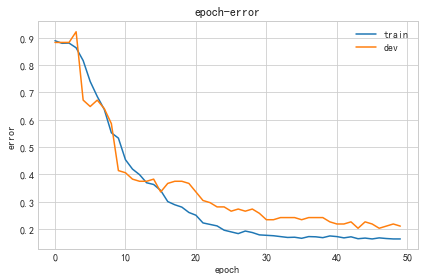

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
plt.style.use("seaborn-whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#math range error
#改变切片数量后 需要重新运行一遍
###**   X是三维矩阵(三维列表)
#weignts biases 都是三维矩阵 2 (784*30)(30*10) 2 (1*30) (1*10)
#batch size 的迭代方式 每次大小都是固定相同的 如果不够则不会迭代剩余部分(再取下去) 例如样本总数为30 batch_size为16 则只会迭代一次
from functools import reduce

points={}
points2={}

#0.7828125

class MyNeuralNetwork(object):
    def __init__(self, sizes):
        #神经网络层数
        self.num_layers = len(sizes)
        
        #设置每层的神经元个数
        self.sizes = sizes
        
        #预训练初始化
#         with open("weights.json",'r') as load_f:
#             self.weights= json.load(load_f)
        
#         with open("biases.json",'r') as load_f:
#             self.biases= json.load(load_f)
        
        
        # 初始输入层，随机产生每层中的y个神经元的biase值（0,1）
        
        #x行y列 矩阵列表 保存权重
        
#         self.weights=[normal_matrix(0,1,x,y) for x,y in zip(sizes[:-1],sizes[1:])]
        self.weights=[MatrixHadamard(normal_matrix(0,1,x,y),[[0.01 for j in range(y)] for i in range(x)])  for x,y in zip(sizes[:-1],sizes[1:])]

#         self.weights=[normal_matrix(0,1,x,y) for x,y in zip(sizes[:-1],sizes[1:])]
        
#         print(len(self.weights))
#         print(len(self.weights[0]))

        #1行y列 偏置列表
#         self.biases=[normal_matrix(0,1,1,y) for y in sizes[1:]]
#         self.biases=[MatrixHadamard(normal_matrix(0,1,1,y),[[0.1 for j in range(y)]]) for y in sizes[1:]]
        self.biases=[uniform_matrix(0,0,1,y)  for y in sizes[1:]]
    
#         print('初始权重:')
#         print(self.biases[0])

#         print(len(self.biases[1][0]))
#         print(self.biases[0])
    
    #训练集 测试集 迭代次数 batch大小 学习率
    def training(self,x_train,y_train,x_test,y_test,epochs,batch_size,eta):
        print('训练集数量: ')
        print(len(x_train))
        #迭代 epoch
        for epo in range(epochs):
            #损失函数 训练中预测正确的样本个数
            test_correct,train_correct=(0,0)
            
            #打乱训练集顺序
            temp = list(zip(x_train,y_train))
            random.shuffle(temp)
            x_train[:], y_train[:] = zip(*temp)
            
            
            #batchsize 迭代  第几个batch_size
            for n_batch_size in range((int(len(x_train)/batch_size))):
                batch_start,batch_end=((n_batch_size*batch_size),((n_batch_size+1)*batch_size))
                #python 切片 左闭右开 [)
                #输入矩阵 并降维为二维矩阵  error 不降维不会报错，但是前十行数会相同  (此切片是三维矩阵)   测试点 
                X=reduce(lambda x,y:x+y,x_train[batch_start:batch_end])
                
#                 print(len(X))

                #保存第二层到最后一层神经元的z z是一个三维矩阵
                z=[]
                #加入加入 第一层x=a=z
                z.append(X)
                
                #前向传播  最终X为batch_size*10大小的二维矩阵
                for w,b in zip(self.weights,self.biases):
                #每一层的z
                    X=Matrixadd(MatrixMulti(X,w),b*len(X))
                    z.append(X)
                       
                #每一层的a
                    operateMatrix('activate',X)
                
                #z 2 10*30 10*10

                #流程：
                #全局定义 每个batch中的 b、w总更新的梯度
                #计算每个batch_size中每一个样本的反向传播 求出b、w更新的梯度
                #累加batch_size中样本的 b、w更新的梯度
                #根据累加的梯度 更新全局w和b 

                Y=y_train[batch_start:batch_end]
                
                #Todo 显示预测结果 评估准确率
                
                #每个batch_size之后的 权重 偏置 总量之和
                batch_nabla_w=[ [[0]*col for row in range(r)] for r,col in zip(self.sizes[:-1],self.sizes[1:])]
                batch_nabla_b=[[[0]*col ] for col in self.sizes[1:]]
                
                #第k个样本 0-----9 (共10个)
                for k in range(batch_size):
                    train_correct+=count_corr(X[k],Y[k])
                    #更新的权重和偏置 矩阵 结构同 weights biases相同
                    #2 784*30 30*10
                    nabla_w=[ [[0]*col for row in range(r)] for r,col in zip(self.sizes[:-1],self.sizes[1:])]
                    #2 1*30 1*10
                    nabla_b=[[[0]*col ] for col in self.sizes[1:]]
                    
                    #保存每一层的神经单元误差 2 1*30 1*10
                    delta=[[[0]*col ] for col in self.sizes[1:]]
                    
                    #最后一层
                    #一维列表 长度为10     e1111 弄成二维1*10''''''
                    delta[-1][0]= [(X[k][j]-Y[k][j])*activate(z[-1][k][j])*(1-activate(z[-1][k][j])) for j in range(len(delta[-1][0]))] 
                    #三行二列 b=[ [i*j for i in range(2)] for j in range(3)]
#                     print(len(nabla_w[-1][0])) #10
#                     print(len(nabla_w[-1]))  #30
                                   #核心部分  这是个二维矩阵   i(30)行j(10)列
                    nabla_w[-1]=[ [delta[-1][0][j]*activate(z[-2][k][i]) for j in range(len(nabla_w[-1][0]))] for i in range(len(nabla_w[-1]))]

                      #核心部分  此处也要弄成一个二维矩阵
                    nabla_b[-1]=[[ delta[-1][0][j] for j in range(len(nabla_b[-1][0])) ]]
                                        
                    for l in range(2, self.num_layers):
                        #第l层的神经元个数 30
                        for i in range(len(delta[-l][0])):
#                             print(len(delta[-l][0]))
                            #第l+1层的神经元个数 10
                            for m in range(len(delta[-l+1][0])):#may error 去掉[0]
#                                 print(len(delta[-l+1][0]))     nabla_w矩阵 -l+1层 30*10
#                                 print(len(nabla_w[-l+1][3]))
                                delta[-l][0][i]+=delta[-l+1][0][m]*self.weights[-l+1][i][m]  #Attention i与m的次序
                            delta[-l][0][i]*=(activate(z[-l][k][i])*(1-activate(z[-l][k][i])))
                            #activate(z[-l-1][k][i]) 超出范围 x1=a1 x2=a2 输入层也是a!!!!!!!!!!!!
                        if((-l)!=(-self.num_layers+1)):
                            nabla_w[-l]=[ [delta[-l][0][j]*activate(z[-l-1][k][i]) for j in range(len(nabla_w[-l][0]))] for i in range(len(nabla_w[-l]))]
                        else:   #第一层的a不用激活 即a1i=z1i   ### X
                            nabla_w[-l]=[ [delta[-l][0][j]*z[-l-1][k][i] for j in range(len(nabla_w[-l][0]))] for i in range(len(nabla_w[-l]))]
                            
                        nabla_b[-l]=[[ delta[-l][0][j] for j in range(len(nabla_b[-l][0])) ]]
                        
                    #每一层的权重、偏置增量更新完成    更新每个样本的权重、偏置增量 累加到一个batch中的权重、偏置增量中去去去去去
#                     for b_w,b_b,w,b in zip(batch_nabla_w,batch_nabla_b,nabla_w,nabla_b):
#                         b_w=Matrixadd(b_w,w)
#                         b_b=Matrixadd(b_b,b)
                    
                    for i in range(self.num_layers-1):
                        batch_nabla_w[i]=Matrixadd(batch_nabla_w[i],nabla_w[i])
                        batch_nabla_b[i]=Matrixadd(batch_nabla_b[i],nabla_b[i])
                        
                #更新总权重    
                #  for all_w,all_b,b_w,b_b in zip(self.weights,self.biases,batch_nabla_w,batch_nabla_b):
                for i in range(self.num_layers-1):
#                     print(len(self.weights[i])) #784
#                     print(len(self.weights[i][0])) #30
#                     print(len(batch_nabla_w[i]))#784
#                     print(len(batch_nabla_w[i][0]))#30
#                     print(Matrixadd(self.weights[i],MatrixHadamard(batch_nabla_w[i],[ [(eta/batch_size) for col_w in range(len(self.weights[i][0])) ] for row_w in range(len(self.weights[i]))])))
#                     print(Matrixadd(self.biases[i],MatrixHadamard(batch_nabla_b[i],[ [(eta/batch_size) for col_b in range(len(self.biases[i][0]))] for row_b in range(len(self.biases[i]))])))
                    self.weights[i]=Matrixsub(self.weights[i],MatrixHadamard(batch_nabla_w[i],[ [(eta/batch_size) for col_w in range(len(self.weights[i][0])) ] for row_w in range(len(self.weights[i]))]))
#                     print('第{}次'.format(i))
#                     
                    self.biases[i]=Matrixsub(self.biases[i],MatrixHadamard(batch_nabla_b[i],[ [(eta/batch_size) for col_b in range(len(self.biases[i][0]))] for row_b in range(len(self.biases[i]))]))
#                     print(self.biases[i])
            
#                 print('此处更新总权重{}——{}'.format(n_batch_size,self.biases[0]))
                    
                    
                    
                                       
                        
#                         print(len(delta[-l][0]))  #30
#                     print(len(nabla_w[-l]))    #784
#                     print(len(nabla_w[-l][0]))   #30
                        
                    
#            不要去掉 更新参数后添加  训练集误差
            print('第{}次epo-test9后准确率为:'.format(epo+1))
#             print(self.weights[0])
#             print(int(len(x_train)))
            print(train_correct/ ((int(len(x_train)/batch_size))*batch_size))
            points[epo]=1-(train_correct/ ((int(len(x_train)/batch_size))*batch_size))
            
            #验证集误差
            dev_X=reduce(lambda x,y:x+y,x_test)
            #前向传播  最终X为batch_size*10大小的二维矩阵
            for w,b in zip(self.weights,self.biases):
                dev_X=Matrixadd(MatrixMulti(dev_X,w),b*len(dev_X))
                operateMatrix('activate',dev_X)
            
            dev_Y=y_test
            
            for i in range(len(dev_X)):
                test_correct+=count_corr(dev_X[i],dev_Y[i])
            
            points2[epo]=1-test_correct/len(dev_X)
        
        #保存参数
#         with open("weights.json","w")as f:
#             json_str=json.dump(self.weights,f)
        
#         with open("biases.json","w")as f:
#             json_str=json.dump(self.biases,f)
        
        plt.plot(list(points.keys()),list(points.values()),label='train')
        plt.plot(list(points2.keys()),list(points2.values()),label='dev')
        plt.title("epoch-error")
        plt.xlabel("epoch")
        plt.ylabel("error")
        plt.tight_layout()
        plt.legend()
                    
                    
                    #每一层的神经单元误差 从倒数第二层倒数到第二层 
#                     for l in range(2, self.num_layers):
                    
#                     print(z[-1])
               

#0.15625                                     
myNN=MyNeuralNetwork([784,30,10])
x_train=x_train[0:1280]
y_train=y_train[0:1280]
x_test=x_test[0:128]
y_test=y_test[0:128]
epochs=50
batch_size=4
eta=0.1
myNN.training(x_train,y_train,x_test,y_test,epochs,batch_size,eta)                   
   

            

In [5]:
#单元测试用例
# Va=[[1,2,3],[4,5,6]]
# Vb=[[1],[2],[3]]
# print(MatrixMulti(Va,Vb))
# print(activate(2))
# Va=[1,2,3]
# Vb=[4,5,6]
# print(VectorHadamard(Va,Vb))
sizes=['a','b','c','d','e']
for x, y in zip(sizes[:-1], sizes[1:]):
    print(x,y)
    
    
#打乱训练集顺序     
x_te=['a','b','c']
y_te=[1,2,3]
temp = list(zip(x_te, y_te))
print(temp)
random.shuffle(temp)
print(temp)
print(*temp)

x_te[:], y_te[:] = zip(*temp)
print(x_te,y_te)

#[('a', 1), ('b', 2), ('c', 3)]
#[('c', 3), ('a', 1), ('b', 2)]
#('c', 3) ('a', 1) ('b', 2)
#['c', 'a', 'b'] [3, 1, 2]

#X Y此时均为二维矩阵 二维列表，第一维度为第i个样本
#                 print('X{}=:'.format(n_batch_size))
#                 print(X)
#                 print('Y{}=:'.format(n_batch_size))
#                 print(Y)


#遍历每个batch_size中的样本，计算反向传播 _____更新权重___ 一共打印60次 2*3*10
#                 for a_l,y in zip(X,Y): 
#                     print(a_l,y)

a b
b c
c d
d e
[('a', 1), ('b', 2), ('c', 3)]
[('a', 1), ('b', 2), ('c', 3)]
('a', 1) ('b', 2) ('c', 3)
['a', 'b', 'c'] [1, 2, 3]


In [6]:
from functools import reduce
a = [2,22,222]
Sn = reduce(lambda x,y:x+y,a)
print(Sn)

246


In [7]:
A=[[[1,2],[1,3],[2,5]],[[2,4],[2,5],[2,6]],[[3,5],[3,6],[3,7]]]
B=reduce(lambda x,y:x+y,A)
print(reduce(lambda x,y:x+y,A))
print(reduce(lambda x,y:Matrixadd(x,y),A))
x=[[1,2],[1,3],[2,5]]
y=[[2,4],[2,5],[2,6]]
#****机制：拆开括号后合并
print(x+y)
print(B[0][0])

[[1, 2], [1, 3], [2, 5], [2, 4], [2, 5], [2, 6], [3, 5], [3, 6], [3, 7]]
[[6, 11], [6, 14], [7, 18]]
[[1, 2], [1, 3], [2, 5], [2, 4], [2, 5], [2, 6]]
1


In [8]:
layer=[784,40,10]
bias=[30,10]
for i in layer[::-1]:
    print(i)

10
40
784


In [9]:
print([0] for i in range(10))

<generator object <genexpr> at 0x0000016789DAD190>


In [31]:
#三行二列
b=[ [i*j for i in range(2)] for j in range(3)]
print(b)

[[0, 0], [0, 1], [0, 2]]


In [32]:
c=[[ i for i in range(10)] for j in range(2)]
print(c)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


In [33]:
def count_corr(y,label):
    return int(y.index(max(y))==label.index(1))
y=[0.2,0.9,0.3,0.1,0.5,0.8]
label=[0,0,0,1,0,0]
print(count_corr(y,label))

0


In [10]:
a=[  [for i in range(3)] for j in range(4)]
print(a)

SyntaxError: invalid syntax (<ipython-input-10-2a2226ab111f>, line 1)

In [ ]:
print(math.log(9))

In [ ]:
test=[ [i*j]for i in range(3) for j in range(4)]
print(test)

In [ ]:
a=[1,2,3,4]
b=[5,6,7,8]
c=[9,10,11,12]
d=[13,14,15,16]
#error 这种遍历方式不会改变原列表
for a1,b1,b2,b3 in zip(a,b,c,d):
    a1=b1+b2+b3
    print(a1)
print(a)
print(b)
print(c)
print(d)

In [3]:
import json
para=[[[1],[2,3,4]]]
with open("paras.json","w")as f:
    json_str=json.dump(para,f)
print('文件加载完成')
print(json_str)
print(type(json_str))

文件加载完成
None
<class 'NoneType'>


In [8]:
with open("paras.json",'r') as load_f:
    save= json.load(load_f)
print(save)
print(type(save))

[[[1], [2, 3, 4]]]
<class 'list'>
